<a href="https://colab.research.google.com/github/zhrvdt77/DSPS_ZVahdat/blob/main/Class_practice_Sep_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv',header=None,names=["Population","Wspeed","City"])

Text(0, 0.5, 'Walking speed, feet/s')

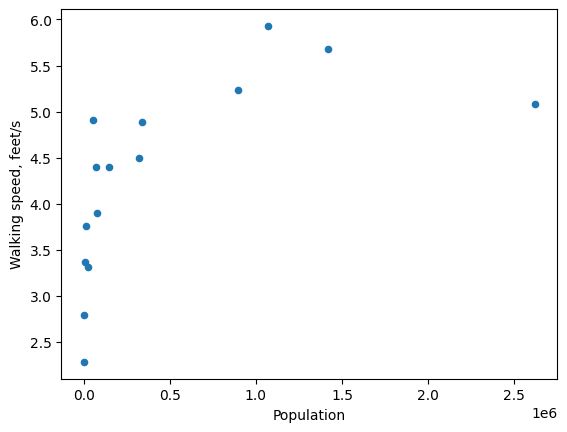

In [31]:
ax=df.plot("Population","Wspeed",kind="scatter")
ax.set_xlabel('Population')
ax.set_ylabel('Walking speed, feet/s')

In [22]:
df["Logpopulation"]=np.log10(df["Population"])

Text(0, 0.5, 'Walking speed, feet/s')

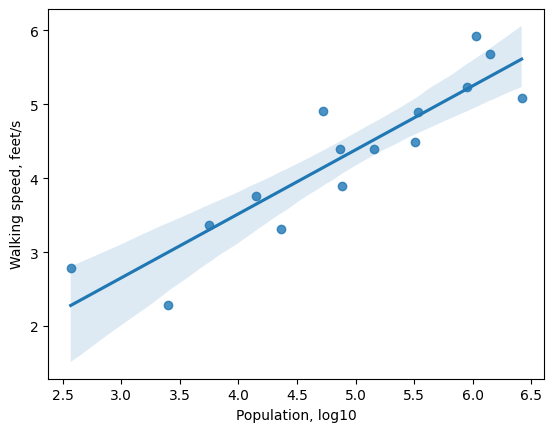

In [42]:
ax=sns.regplot(x=df["Logpopulation"],y=df["Wspeed"])
ax.set_xlabel('Population, log10')
ax.set_ylabel('Walking speed, feet/s')

In [28]:
def sumsqerr(y_true,y_pred):
    return(((y_true-y_pred)**2).sum())

In [29]:
def line(slope,intercept, x):
  return (slope*x+intercept)

In [34]:
minnow=1e7
for s in np.arange(0,3,0.01):
  for i in np.arange(0,2,.01):
    prediction=line(s,i, df["Logpopulation"])
    sse=sumsqerr(df["Wspeed"],prediction)
    if sse<minnow:
      minnow=sse
      slope_manual, intercept_manual=s,i
slope_manual, intercept_manual

(0.87, 0.03)

In [69]:
df["y_manual"]=slope_manual*df["Logpopulation"]+intercept_manual

In [70]:
df

,Population,Wspeed,City,Logpopulation,y_manual
0,2520.0,2.28,Itea,3.401401,2.989218
1,370.0,2.79,Psychro,2.568202,2.264335
2,5650.0,3.37,Netanya,3.752048,3.294282
3,14100.0,3.76,Corte,4.149219,3.639821
4,23300.0,3.31,Safed,4.367356,3.829600
5,52600.0,4.91,Dimona,4.720986,4.137258
6,73300.0,4.40,Netanya,4.865104,4.262640
7,77100.0,3.90,New Haven,4.887054,4.281737
8,145000.0,4.40,Jerusalem,5.161368,4.520390
9,320000.0,4.49,Brno,5.505150,4.819480


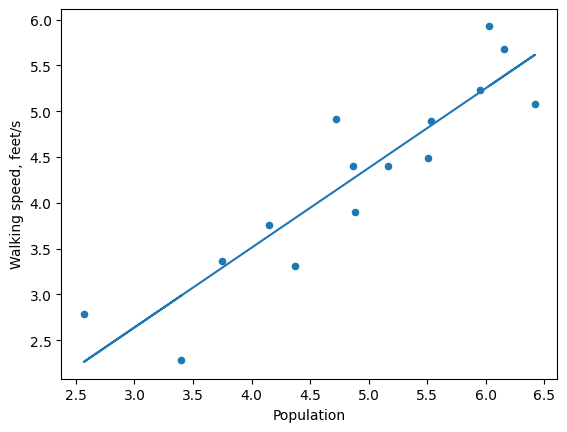

In [83]:
ax=df.plot("Logpopulation","Wspeed",kind="scatter")
ax.set_xlabel('Population')
ax.set_ylabel('Walking speed, feet/s')
ax.plot(df["Logpopulation"],df["y_manual"],label="manual")

In [ ]:
#np.polyfit

In [72]:
df["Logpopulation"].values.reshape(-1,1)

array([[3.40140054],
       [2.56820172],
       [3.75204845],
       [4.14921911],
       [4.36735592],
       [4.72098574],
       [4.86510397],
       [4.88705438],
       [5.161368  ],
       [5.50514998],
       [5.53275438],
       [5.95230801],
       [6.41830129],
       [6.15228834],
       [6.02938378]])

In [46]:
linreg=LinearRegression()

In [74]:
linreg.fit(df["Logpopulation"].values.reshape(-1,1), df["Wspeed"])
print("intercept:",linreg.intercept_)
print("slope:",linreg.coef_)
print("coefficient of determination:",linreg.score(df["Logpopulation"].values.reshape(-1,1), df["Wspeed"]))


intercept: 0.05664889151453334
slope: [0.8653381]
coefficient of determination: 0.8216814457855732


In [77]:
df["y_predict"]=df["Logpopulation"]*linreg.coef_+linreg.intercept_

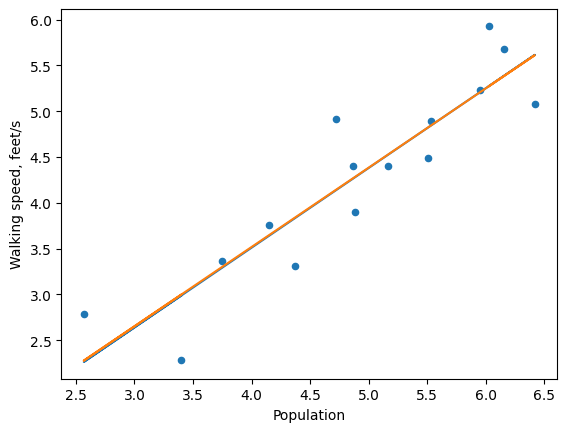

In [80]:
ax=df.plot("Logpopulation","Wspeed",kind="scatter")
ax.set_xlabel('Population')
ax.set_ylabel('Walking speed, feet/s')
ax.plot(df["Logpopulation"],df["y_manual"],label="manual")
ax.plot(df["Logpopulation"],df["y_predict"],label="prediction")
